<h3>
    Task 1 <br>
    Read the dataset from below link
</h3>

In [1]:
import pandas as pd
import numpy as np

In [2]:
varDataset = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [3]:
varDataset.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


<h3>
1 Delete unnamed columns
</h3>

In [4]:
# add additinoal columns as target dataframe has just only 1 unnamed column
varDataset['Unnamed: 1'] = np.random.randint(1,9999,varDataset.shape[0])
varDataset['Unnamed: 2'] = np.random.randint(1,9999,varDataset.shape[0])

varDataset.shape

(1016395, 9)

In [5]:
# delete those columns
varDataset.columns.str.contains('Unnamed:') == False

array([False,  True,  True,  True,  True,  True,  True, False, False])

In [6]:
varDataset = varDataset.iloc[:,varDataset.columns.str.contains('Unnamed:')==False]
varDataset.shape

(1016395, 6)

<h3>
2 show the distribution of male and female
</h3>

In [7]:
varGroupByGender = varDataset.groupby('Gender')
varGroupByGender['Id'].count()

Gender
F    558846
M    457549
Name: Id, dtype: int64

<h3>
3 show the top 5 most preferred names
</h3>

In [ ]:
# Group by Name column
varGroupByNames = varDataset.groupby('Name')

In [41]:
# summarize the count into a dataframe
summarizedByName = pd.DataFrame(varGroupByNames['Name'].count())
summarizedByName.columns

Index(['Name'], dtype='object')

In [43]:
# rename and sort by Count column to get top 5 names
summarizedByName = summarizedByName.rename(columns={'Name': 'Count'})

In [44]:
summarizedByName.sort_values(by='Count', ascending=False)[0:5]

,Count
Name,
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049


<h3>
4 What is the median name occurence in the dataset
</h3>

In [45]:
medianNo = int(summarizedByName.shape[0]/2)

In [46]:
summarizedDF[medianNo-1:medianNo]

,Names,Count
Name,,
Kaeley,"(Kaeley, [Kaeley, Kaeley, Kaeley, Kaeley, Kael...",12


<h3>
5 Distribution of male and female born count by dates
</h3>

In [48]:
varGroupByYearGender = varDataset.groupby(['Year', 'Gender'])
varGroupByYearGender['Name'].count()

Year  Gender
2004  F         48083
      M         38337
2005  F         49196
      M         39298
2006  F         50851
      M         40952
2007  F         52234
      M         42098
2008  F         52568
      M         42402
2009  F         51987
      M         42622
2010  F         51084
      M         42223
2011  F         50651
      M         41894
2012  F         50722
      M         42302
2013  F         50440
      M         42303
2014  F         51030
      M         43118
Name: Name, dtype: int64

<h3>
Task 2: <br>
We have the min and max temparatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below <br>
1 Fitting it to Periodiac function <br>
2 plot the fit
</h3>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as sco
from scipy.interpolate import interp1d

In [52]:
# Given data
MaxTem = list([39, 41, 43, 47,49,51,45,38,37,29,27,25])
MinTem = list([21,23,27,28,32,35,31,28,21,19,17,18])
months = np.arange(12) + 1
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

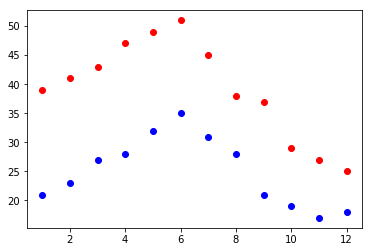

In [53]:
# Plot given data to visualize the kind of function required
plt.plot(months,MaxTem, 'or')
plt.plot(months,MinTem, 'ob')

In [54]:
# write a function to get a relationship in sin form
def randomFunction(x,a, b):    
    return  a + b * np.sin(np.float64(x)/np.pi)

# capture parameters using given data or training data
params, extras = sco.curve_fit(randomFunction, months, MaxTem)
params2, extras2 = sco.curve_fit(randomFunction, months, MinTem)
print(params)
print(params2)

[32.51077693 15.47119534]
[20.71265321  9.84243718]


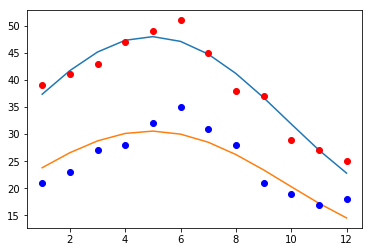

In [55]:
# plot graphs by providing validation data and parameters
plt.plot(months, randomFunction(months, *params), '-')
plt.plot(months, randomFunction(months, *params2), '-')
plt.plot(months,MaxTem, 'or')
plt.plot(months,MinTem, 'ob')